<a href="https://colab.research.google.com/github/jinnykj/PokemonGO-Review-dataset-analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B8%B0%EB%A7%90_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


In [2]:
import seaborn as sns

In [3]:
uploaded = files.upload()

Saving pokemon_reviews.xlsx to pokemon_reviews.xlsx


데이터에 thumbs up 카테고리 넣어서까지 분석하기.

In [4]:
data = pd.read_excel('pokemon_reviews.xlsx')

In [5]:
df = data.drop(columns='userName').reset_index()

In [6]:
df= df.dropna()

In [7]:
df['review_length']=df['content'].apply(len)

In [8]:
df.head()

,index,content,score,reviewCreatedVersion,review_length
0,0,The most useless game ever. Spent so much mone...,1,0.29.0,326
1,1,So many bugs and issues and the gameplay is qu...,1,0.29.0,284
2,2,This game would be great if they could get the...,3,0.29.0,144
3,3,"Had to uninstall game do to a bad update, now ...",4,0.29.0,134
4,4,Will not recognize my account. Changed the pas...,1,0.29.0,100


In [9]:
countscore = df.groupby('score').count().reset_index()

In [10]:
countscore['size'] = countscore['index'].sum()

In [11]:
countscore

,score,index,content,reviewCreatedVersion,review_length,size
0,1,24983,24983,24983,24983,108544
1,2,8894,8894,8894,8894,108544
2,3,13925,13925,13925,13925,108544
3,4,19281,19281,19281,19281,108544
4,5,41461,41461,41461,41461,108544


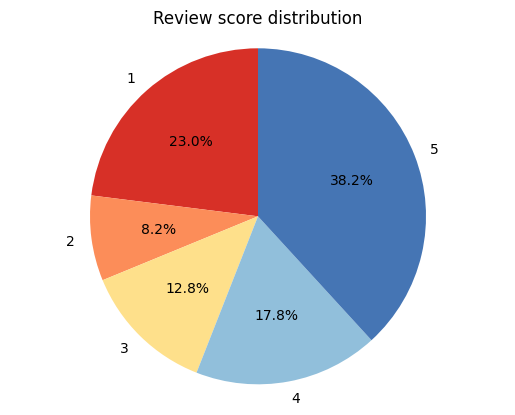

In [12]:
labels =countscore['score']
sizes = countscore['index']

plt.pie(sizes,labels = labels,autopct='%1.1f%%', colors = ['#d73027', '#fc8d59', '#fee08b', '#91bfdb', '#4575b4'], startangle=90)
plt.axis('equal')
plt.title('Review score distribution')
plt.show()

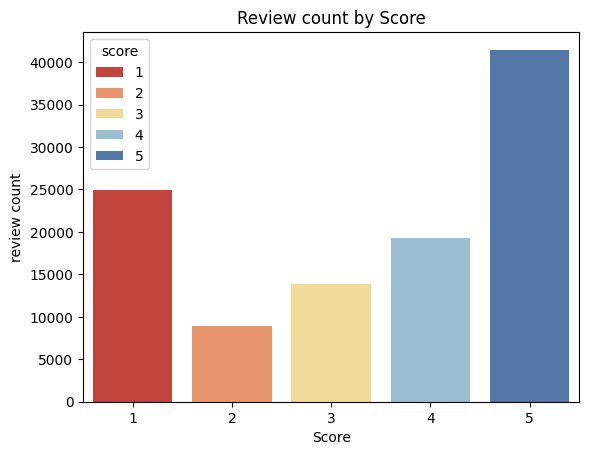

In [13]:

sns.barplot(x='score',y='content',data=countscore,errorbar=None,hue='score',palette=['#d73027', '#fc8d59', '#fee08b', '#91bfdb', '#4575b4'])
plt.title('Review count by Score')
plt.xlabel('Score')
plt.ylabel('review count')
plt.legend(title='score')
plt.show()

In [14]:
averagescore = df.groupby('reviewCreatedVersion')['score'].mean().reset_index().drop(index=range(173, 223))

In [15]:
averagescore

,reviewCreatedVersion,score
0,0.101.1,2.923077
1,0.103.3,3.350000
2,0.103.5,4.000000
3,0.105.0,3.322581
4,0.105.1,3.468750
...,...,...
168,0.261.0,3.221461
169,0.261.1,3.219963
170,0.261.2,3.500000
171,0.261.3,3.311801


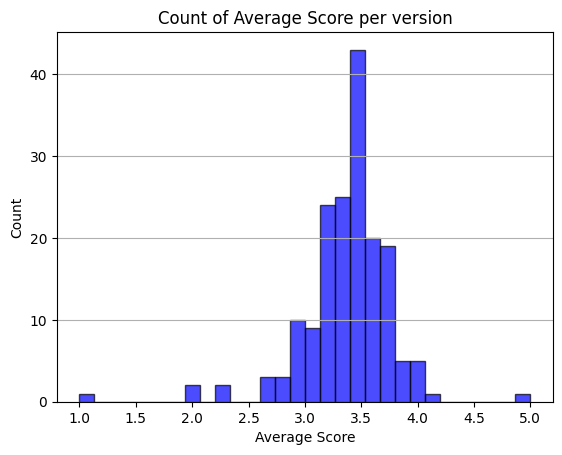

In [16]:
avsc = averagescore['score']
plt.hist(avsc,bins=30,alpha=0.7,color='blue',edgecolor='black')
plt.title('Count of Average Score per version')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [17]:
scorecount = df.groupby('reviewCreatedVersion')['score'].value_counts().unstack(fill_value=0).reset_index().drop(index=range(173, 223))
scorecount=scorecount.drop(columns='reviewCreatedVersion')
scorecount['totalcount'] = scorecount.sum(axis=1)
scorecount['averagescore'] = averagescore['score']
scorecount['version'] = averagescore['reviewCreatedVersion']

In [18]:
scorecount

score,1,2,3,4,5,totalcount,averagescore,version
0,4,1,3,2,3,13,2.923077,0.101.1
1,4,3,3,2,8,20,3.350000,0.103.3
2,0,1,1,1,3,6,4.000000,0.103.5
3,8,1,6,5,11,31,3.322581,0.105.0
4,6,2,6,7,11,32,3.468750,0.105.1
...,...,...,...,...,...,...,...,...
168,115,48,57,61,157,438,3.221461,0.261.0
169,156,51,63,60,211,541,3.219963,0.261.1
170,83,34,45,46,172,380,3.500000,0.261.2
171,211,75,98,94,327,805,3.311801,0.261.3


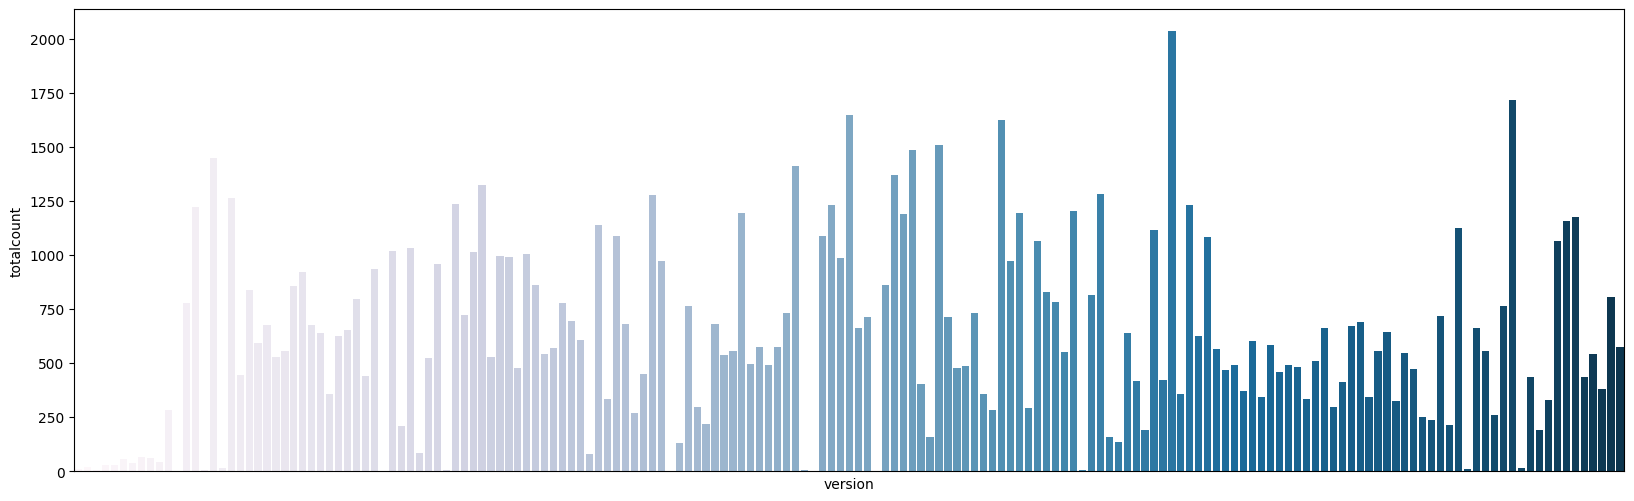

In [55]:
plt.figure(figsize=(20,6))

sns.barplot(data=scorecount,x='version',y='totalcount',hue='version',palette='PuBu')
plt.xticks([])
plt.show()

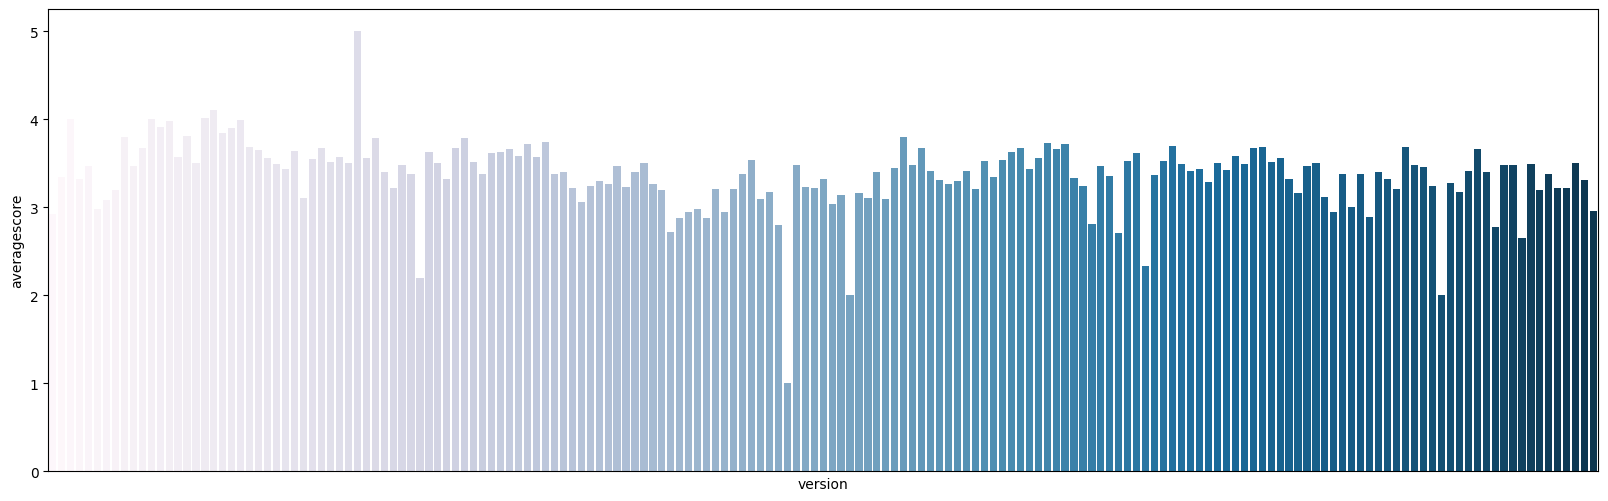

In [56]:
plt.figure(figsize=(20,6))

sns.barplot(data=scorecount,x='version',y='averagescore',hue='version',palette='PuBu')
plt.xticks([])
plt.show()

리뷰의 개수와 리뷰의 평균 score는 크게 상관이 없음을 알 수 있다. 이후의 히트맵에서도 확인되겠지만, 막대그래프로만 표현해보아도 경향성이 닮아있지 않다. 이는 태블로를 활용한 그래프에서 더 확실히 확인된다.

These barplots show that review count and average score has no correlation. It can be also found in hitmap below. It is much more significant in barplot made in Tablo

In [19]:
reviewlen=df.groupby('score')['review_length'].sum().reset_index()

In [20]:
reviewlen['average_len']=reviewlen['review_length']/countscore['index']

In [21]:
reviewlen

,score,review_length,average_len
0,1,4779223,191.299003
1,2,1817330,204.332134
2,3,2575633,184.964668
3,4,3049774,158.175095
4,5,5032229,121.372591


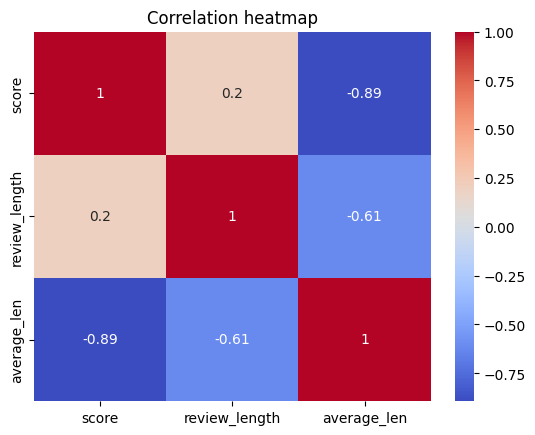

In [22]:
reviewlenandscore=reviewlen.select_dtypes(include=['number'])
corr=reviewlenandscore.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

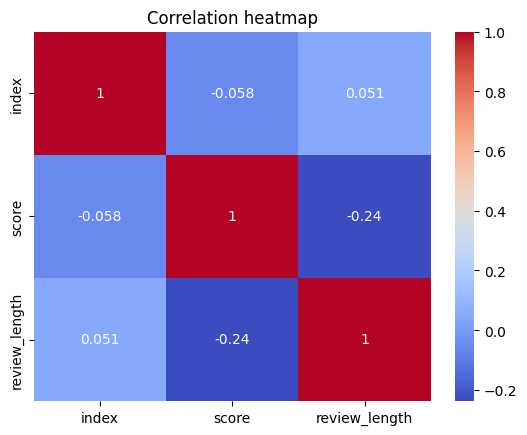

In [23]:
dfnm=df.select_dtypes(include=['number'])
corr=dfnm.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

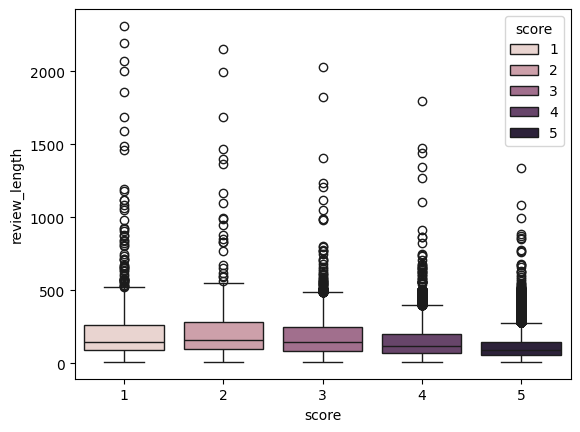

In [47]:
sns.boxplot(data=df,x='score',y='review_length',hue='score')
plt.show()

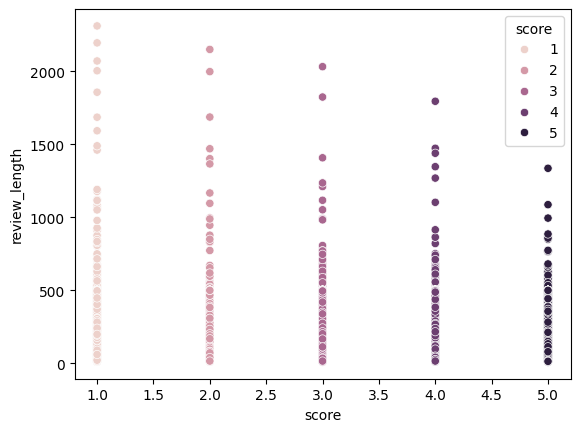

In [48]:
sns.scatterplot(data=df,x='score',y='review_length',hue='score')
plt.show()

점수와 길이의 상관계수는 높지 않지만, 점수와 평균 길이의 상관계수가 높은 것/점수 별 박스플랏의 이상점/극단이상점이 점수와 반비례하는 경향이 보이는 것에 대해서 다음과 같은 해석을 할 수 있다.
1. 대부분의 리뷰는 점수에 상관없이 비슷한 길이로 작성된다.
2. 다만 게임에 불만이 많은 경우가 게임에 만족하는 경우보다 리뷰가 길게 작성될 수 있다.
3. 리뷰 작성자가 라이트유저인지 헤비유저인지와 연관이 있을 수도 있다고 생각된다. 라이트 유저는 별점에 상관없이 상대적으로 짧게 리뷰를 작성하고, 헤비 유저는 기본적으로 길게 리뷰를 작성하되 별점에 따라 그 정도가 반비례한다는 가설을 가지고 추가적으로 조사해볼 수 있겠으나, 주어진 데이터의 한계로 해당 내용을 확인하는 것은 불가능하다.

As corr between score and review length is low while score and average review length is high&boxplot show outliers and scores are inversely proportional, we can think some suggestions below.

1. Most reviews are written with similar lengths, regardless of the score.
2. However, reviews may be longer when users are dissatisfied with the game compared to when they are satisfied.
3. It could also be related to whether the reviewer is a light user or a heavy user. Light users tend to write relatively shorter reviews regardless of the score, while heavy users generally write longer reviews, with review length inversely proportional to the rating given. Although this hypothesis could be investigated further, it cannot be confirmed due to the limitations of the given data.

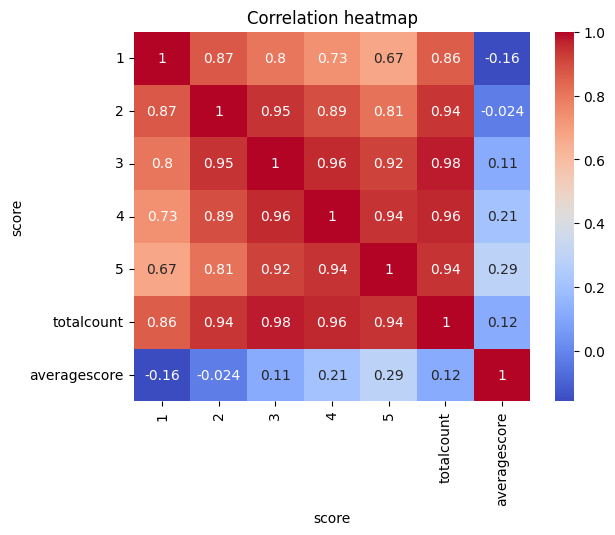

In [ ]:
numericalvalue=scorecount.select_dtypes(include=['number'])
corr=numericalvalue.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [35]:
reviewcount = df.groupby('reviewCreatedVersion')['content'].count().reset_index()

In [36]:
reviewcount

,reviewCreatedVersion,content
0,0.101.1,13
1,0.103.3,20
2,0.103.5,6
3,0.105.0,31
4,0.105.1,32
...,...,...
218,0.93.3,1
219,0.93.4,33
220,0.95.3,15
221,0.97.2,35


In [37]:
df['category'] = pd.cut(df['score'], bins=[0, 2, 3, 5], labels=['bad', 'soso', 'good'])

# 버전별로 각 범주의 개수를 세기
category= df.groupby(['reviewCreatedVersion', 'category']).size().unstack(fill_value=0).reset_index()
category['count']=reviewcount['content']

<ipython-input-37-91c41d56dd98>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category= df.groupby(['reviewCreatedVersion', 'category']).size().unstack(fill_value=0).reset_index()


In [38]:
category=category.drop(index=range(173, 223))

In [39]:
category

category,reviewCreatedVersion,bad,soso,good,count
0,0.101.1,5,3,5,13
1,0.103.3,7,3,10,20
2,0.103.5,1,1,4,6
3,0.105.0,9,6,16,31
4,0.105.1,8,6,18,32
...,...,...,...,...,...
168,0.261.0,163,57,218,438
169,0.261.1,207,63,271,541
170,0.261.2,117,45,218,380
171,0.261.3,286,98,421,805


In [40]:
top15 = category.sort_values(by='count',ascending=False).iloc[:20,].reset_index()

In [41]:
top15 = top15.drop(columns='index')

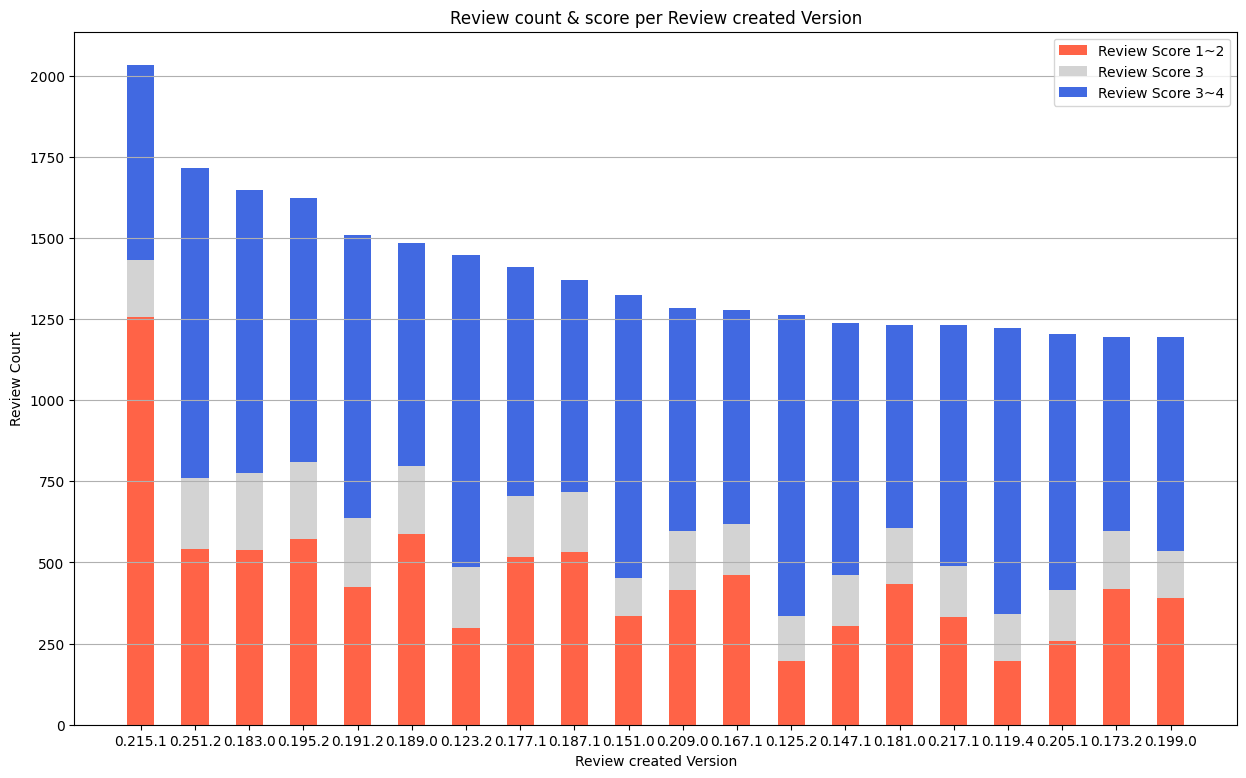

In [46]:
months = top15['reviewCreatedVersion']
Scorebad = top15['bad']
Scoresoso = top15['soso']
Scoregood= top15['good']



plt.figure(figsize=(15,9))
plt.bar(months,Scorebad,label='Review Score 1~2',color='tomato',width=0.5)
plt.bar(months,Scoresoso,bottom = Scorebad , label='Review Score 3',color='lightgray',width=0.5)
plt.bar(months,Scoregood,bottom = Scorebad+Scoresoso , label='Review Score 3~4',color='royalblue',width=0.5)



plt.title('Review count & score per Review created Version')
plt.xlabel('Review created Version')
plt.ylabel('Review Count')
plt.legend()
plt.grid(axis='y')
plt.show()